## Import libraries and load datasets.

- Import Python libraries
- Load `survey_results_public.csv` into a dataframe and inspect the first few lines.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
columns_of_interest = [
    'EmploymentStatus',
    'DeveloperType',
    'HaveWorkedLanguage',
    'WantWorkLanguage',
    'Gender',
    'Salary'
]

sub_df = df.loc[:, columns_of_interest] 

In [5]:
#sub_gen_dev_df = sub_df.dropna(subset=['Gender', 'DeveloperType'])

In [18]:
def get_unique_group_type(df, column):
    '''
    returns the unique values in a list separed with ';' inside a dataframe column
    
    input:
        df: the dataframe to be processed
        column: the name of the column to process
    
    output:
        unique_groups: a list of the unique values from a column of the dataframe 
    '''
    
    return df[column].str.split('; ').explode('index').value_counts().index.to_list()

In [19]:
def get_count_group_type(df, column, groups, percentage = False):
    '''
    returns the total count for each group of values separed with ';' inside a dataframe column
    
    input:
        df: the dataframe to be processed
        column: the name of the column to process
        groups: the list of groups to get the count
        percentage: the flag that defines whether the count should be in numerical value or in percentage
    
    output:
        group_count: a list of each group and the occurrence count inside a dataframe column
    '''
    
    group_count = dict()
    for group in groups:
        count = df[column].apply(lambda s: group in s.split(';')).sum()
        if percentage:
            count = (count / len(df[column])) * 100
        group_count[group] = count
    return group_count

In [65]:
def get_percentage_null(df, column):
    '''
    returns the percentage of null values in a column
    
    input:
        df: the dataframe to be processed
        column: the name of the column to process
    
    output:
        percentage_null: return the percentage of null values in a column
    '''
        
    return (df['Gender'].isnull().sum() / len(df['Gender'])) * 100

---

### What is the gender distribution in the survey?

Analyzing gender distribution within tech surveys provides critical insights into the demographic makeup of the industry. To take a better look on this question we can create a pie chart that shows the distribution of gender within the survey.

In [66]:
#Getting the percentage of null values
print(get_percentage_null(df, 'Gender'))

31.804561021170606


Considering that more than 30% of the gender data are empty, it was decided to keep them in order to keep the information in its original scale, so the values ​​that did not present any information were replaced by the categorical value of not informed

In [55]:
df['Gender_fill'] = df['Gender'].fillna('Not informed')

With that, we need to separed the genders by each unique group and get the count within the dataframe

In [56]:
#Get all the unique genders within the survey
unique_genders = get_unique_group_type(df, 'Gender_fill')

#Get the total count of those genders
genders = get_count_group_type(df, 'Gender_fill', unique_genders)

#Get the percentage of those genders in the survey
genders_percentage = get_count_group_type(df, 'Gender_fill', unique_genders, True)

In [57]:
for key, value in genders_percentage.items():
    print(key, ':', f"{value:.2f}", '%')

Male : 62.05 %
Not informed : 31.80 %
Female : 5.25 %
Other : 0.44 %
Gender non-conforming : 0.32 %
Transgender : 0.14 %


To create a more visible pie chart, we are going to add the Gender non-conforming, Transgender and Others to a single group, so we can identify better the demographic distribution

In [58]:
#Combines the three columns 'Other', 'Gender non-conforming' and 'Transgender' in a single one
keys_to_combine = ['Other', 'Gender non-conforming', 'Transgender']
new_key = 'Gender non-conforming, transgenders and others'
combined_value = sum(genders_percentage[key] for key in keys_to_combine)
combined_data = {new_key: combined_value}
for key in keys_to_combine:
    del genders_percentage[key]
genders_percentage.update(combined_data)

(-1.0999983569022413,
 1.0999997889443442,
 -1.099998726958694,
 1.0999999373682054)

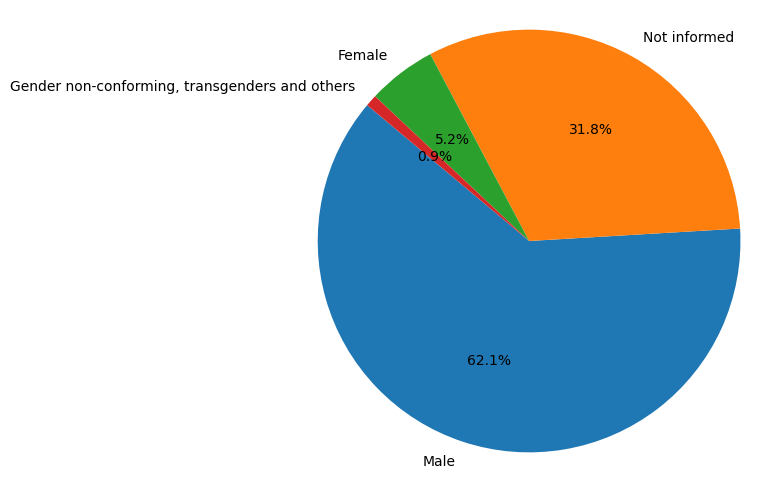

In [59]:
labels = genders_percentage.keys()
sizes = genders_percentage.values()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Set the size of the figure
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # Plot the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


The distribution by gender in the survey demonstrates a large difference between audiences, showing that although more than 30% of participants did not inform which gender they belong to, only 1% corresponded to gender fluid, gender non-conforming, transgenders and others and 5% are women.

---

##  What is the distribution of developer types in relation to each gender?

Understanding the varied roles and preferences among developers sheds light on the diverse skill sets and interests within the industry. To understand better the varied roles and preferences among developers, we want to analiyz the distribution of developer types in relation to each gender.


To undestand better the ditribution between the developer types in relation to each gender, we will remove the values that are null for `Gender` and `DeveloperType`

In [72]:
sub_gen_dev_df = df.dropna(subset=['Gender', 'DeveloperType'])

In [78]:
#Remove the 'Not informed' genre because it will be not used 
unique_genders.remove('Not informed')

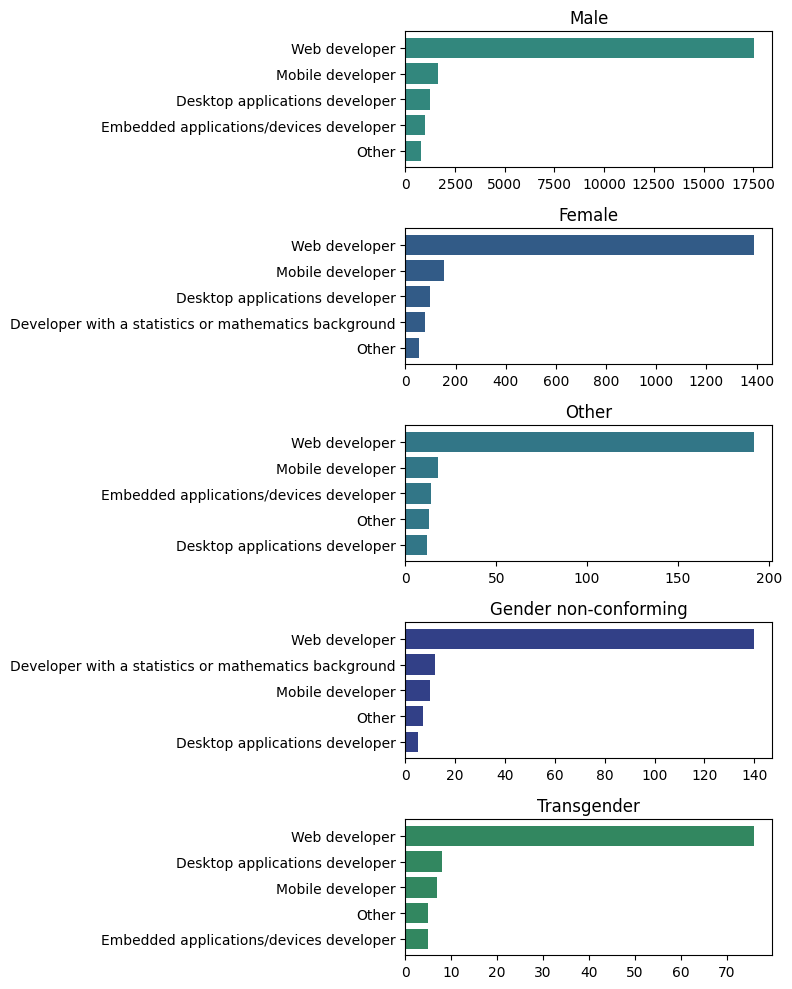

In [80]:
#Get all the unique developer types within the survey
unique_developer_types = get_unique_group_type(sub_gen_dev_df, 'DeveloperType')

#Get the total count of the developer types
developer_types = get_count_group_type(sub_gen_dev_df, 'DeveloperType', unique_developer_types)

#Filter the developer types for each unique genre
filtered_df_developer_types = dict()
for unique_gender in unique_genders:
    filtered_df = sub_gen_dev_df[sub_gen_dev_df['Gender'].str.contains(unique_gender)]
    filtered_count_group_type = get_count_group_type(filtered_df, 'DeveloperType', unique_developer_types)
    filtered_sorted_data = sorted(filtered_count_group_type.items(), key=lambda x: x[1], reverse=True)
    filtered_df_developer_types[unique_gender] = dict(filtered_sorted_data[:5])
    
#Add a custom color for each genre in the plot
fig, axs = plt.subplots(5, figsize=(8, 10))
colors = {
    'Male' : '#32877D',
    'Female' : '#325B87',
    'Other' : '#327687',
    'Gender non-conforming' : '#324087',
    'Transgender' : '#328760'
}
# Plot horizontal bar chart on each subplot using data from the inner dictionaries
for i, (key, inner_data) in enumerate(filtered_df_developer_types.items()):
    inner_data = {key: value for key, value in sorted(inner_data.items(), key=lambda item: item[1], reverse=False)}
    categories = list(inner_data.keys())
    values = list(inner_data.values())
    axs[i].barh(categories, values,color=colors[key])  # Use barh() for horizontal bar plot
    axs[i].set_title(key)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Practically all genres have the same distribution in relation to the type of development they perform. With the majority of interviewees focusing on Web, Mobile and Desktop development

---

## What are the most prevalent programming languages in current development practices, and which ones are in high demand among employers?

There is a very large similarity between the predominant programming languages in development practices and those are in high demand among developers, therefore, many of the languages that are worked on are the same ones that are most sought after by developers.


In [140]:
sub_lang_df = sub_df.dropna(subset=['HaveWorkedLanguage', 'WantWorkLanguage'])

────────────────────────────────────────────────────────────────────────────────────────────────────
Most prevalent programming languages in current development practices:


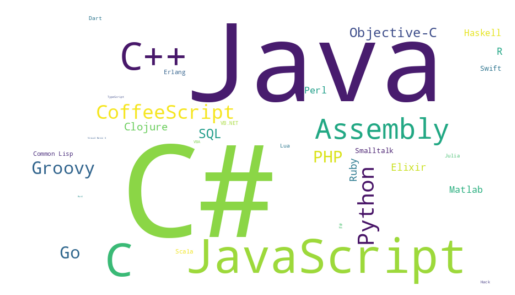

────────────────────────────────────────────────────────────────────────────────────────────────────
Most high demand among employers:


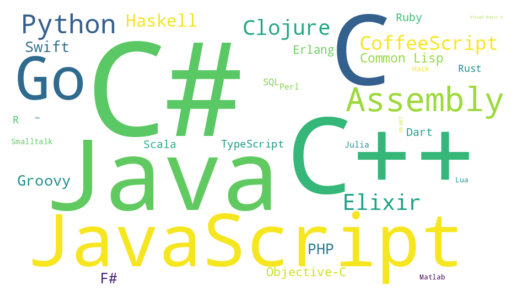

────────────────────────────────────────────────────────────────────────────────────────────────────


In [208]:
unique_worked_lang = get_unique_group_type(sub_lang_df, 'HaveWorkedLanguage')
worked_lang = get_count_group_type(sub_lang_df, 'HaveWorkedLanguage', unique_worked_lang)

print('─' * 100) 
print("Most prevalent programming languages in current development practices:")
worked_lang_wordcloud = WordCloud(width=900,height=500, background_color='white').generate_from_frequencies(worked_lang)
plt.imshow(worked_lang_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

unique_wanted_lang = get_unique_group_type(sub_lang_df, 'WantWorkLanguage')
wanted_lang = get_count_group_type(sub_lang_df, 'WantWorkLanguage', unique_wanted_lang)

print('─' * 100)  
print("Most high demand among employers:")
wanted_lang_wordcloud = WordCloud(width=900,height=500, background_color='white').generate_from_frequencies(wanted_lang)
plt.imshow(wanted_lang_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print('─' * 100)  

---

## What is the relationship between the most used languages and developer salaries?

It is worth noting a big difference when identifying the salary difference between programming languages, where less common languages present a higher salary compared to the average, unlike common languages that present salaries lower than the research average.

In [250]:
sub_lang_df = sub_lang_df.dropna(subset=['Salary'])
lang_salary_df = pd.DataFrame(columns=['Language', 'Salary'])
for worked_lang in unique_worked_lang:
    df_values_split = sub_lang_df['HaveWorkedLanguage'].str.split(';', expand=True)
    filter_condition = df_values_split.apply(lambda row: worked_lang in row.values, axis=1)
    filtered_df = sub_lang_df[filter_condition]
    new_data = {'Language':worked_lang, 'Salary':filtered_df['Salary'].mean()}
    new_df = pd.DataFrame([new_data])
    lang_salary_df = pd.concat([lang_salary_df, new_df], ignore_index=True)

In [252]:
lang_salary_df  = lang_salary_df.dropna() 
lang_salary_df = lang_salary_df.sort_values(by=['Salary'], ascending=False)

In [262]:
mean_salary = lang_salary_df['Salary'].mean()
lang_salary_df['Mean salary difference'] = lang_salary_df['Salary'] - mean_salary

In [263]:
lang_salary_df

,Language,Salary,Mean salary difference
18,VBA,97020.202020,33522.216373
23,Visual Basic 6,97000.000000,33502.014353
29,Smalltalk,89801.039932,26303.054285
26,Rust,81489.084392,17991.098745
19,Scala,81413.239848,17915.254201
30,Common Lisp,80984.779170,17486.793523
27,Clojure,76886.460164,13388.474517
16,Go,73075.740124,9577.754478
22,Lua,68038.123167,4540.137520
34,Hack,64625.795475,1127.809828
